In [11]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score

In [3]:
df = pd.read_excel(r"C:\Users\User\Downloads\logis_customer.xlsx")
with pd.option_context('display.max_rows', 8): display(df)

,gender,age,salary,purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
...,...,...,...,...
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0
399,Female,49,36000,1


In [54]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

x = df.drop('purchased',axis=1)
y = df['purchased']

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0,test_size=0.2)
#test_size=0.25 default

In [56]:
scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

In [57]:
model = LogisticRegression()
model.fit(x_train_sc,y_train)

y_predict_test = model.predict(x_test_sc)

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
print(' <<<<<<<<<< Confusion Matrix >>>>>>>>>> ')
cfmx = confusion_matrix(y_test,y_predict_test)
print(cfmx)

# disp = ConfusionMatrixDisplay(confusion_matrix=cfmx)
# disp.plot(cmap='coolwarm')
# plt.show()

 <<<<<<<<<< Confusion Matrix >>>>>>>>>> 
[[56  2]
 [ 5 17]]


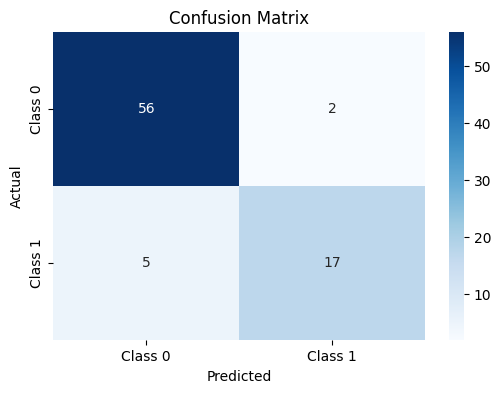

In [59]:
plt.figure(figsize=(6, 4))
sns.heatmap(cfmx, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])

# Customize the plot
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [60]:
print("<<<<< Model Evaluation Matrix >>>>>")
print('Accuracy:', '{:.2f}'.format(accuracy_score(y_test, y_predict_test)))
print('Precision:', '{:.2f}'.format(precision_score(y_test, y_predict_test)))
print('Recall:', '{:.2f}'.format(recall_score(y_test, y_predict_test)))
print('F1 Score:', '{:.2f}'.format(f1_score(y_test, y_predict_test)))
err = (cfmx[0, 1] + cfmx[1, 0]) / y_test.count()
print('Error Rate', '{:.2f}'.format(err))
print()
print("<<<<< Classification Report >>>>>")
print()
print(classification_report(y_test, y_predict_test))

<<<<< Model Evaluation Matrix >>>>>
Accuracy: 0.91
Precision: 0.89
Recall: 0.77
F1 Score: 0.83
Error Rate 0.09

<<<<< Classification Report >>>>>

              precision    recall  f1-score   support

           0       0.92      0.97      0.94        58
           1       0.89      0.77      0.83        22

    accuracy                           0.91        80
   macro avg       0.91      0.87      0.89        80
weighted avg       0.91      0.91      0.91        80



macro avg ?
weight avg all avg from all classes

In [68]:
# #Deploy the model
# gender = 'Male'
# gender_enc = le.transform([gender])[0] # Encode and extract the encoded value
# age = 45
# salary = 45000
# # Prepare input data as a 2D array
# x_pred = [[gender_enc, age, salary]]
# # Scale the input data
# x_pred_sc = scaler.transform(x_pred)
# # Make prediction
# y_pred = model.predict(x_pred_sc)
# # 0 = Not Purchase, 1 = Purchase
# print('Prediction:')
# p = 'Not Purchase' if y_pred[0] == 0 else 'Purchase'
# print(f'gender: {gender}, age: {age}, salary: {salary} ==>', p)

ValueError: invalid literal for int() with base 10: np.str_('Male')

In [71]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=0.25) 

In [72]:
y_pred_th_0_5 = model.predict(x_test_sc)
print('Confusion Matrix Threshold = 0.5')
print(confusion_matrix(y_test, y_pred_th_0_5))
print()

proba = model.predict_proba(x_test_sc)
# Apply the binarizer to your data
y_bin_th_0_25 = binarizer.transform(proba) 
# y_bin_th_0_25 = binarize(proba, threshold=0.25)
y_pred_th_0_25 = y_bin_th_0_25[:, 1]
print('Confusion Matrix Threshold = 0.25')
print(confusion_matrix(y_test, y_pred_th_0_25))

Confusion Matrix Threshold = 0.5
[[56  2]
 [ 5 17]]

Confusion Matrix Threshold = 0.25
[[47 11]
 [ 0 22]]


tuning train&test, random state, treshold 

In [73]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

Solution 1:

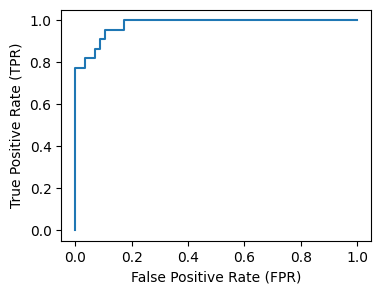

AUC Score: 0.98


In [ ]:
probs = model.predict_proba(x_test_sc)
probs = probs[:, 1]
fpr, tpr, threshold = roc_curve(y_test, probs)
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.show()
auc_score = auc(fpr, tpr)
print('AUC Score:','{:.2f}'.format(auc_score)) #>> full score = 1

In [76]:
probs = model.predict_proba(x_test_sc)[:, 1]
auc_score = roc_auc_score(y_test, probs)
print('AUC Score:', f'{auc_score:.2f}')

AUC Score: 0.98
